In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")
df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
df.shape

(640840, 10)

In [9]:
df.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

In [11]:
df.nunique()

True_index             640840
Store_ID                 1115
Day_of_week                 7
Date                      942
Nb_customers_on_day      3886
Open                        2
Promotion                   2
State_holiday               4
School_holiday              2
Sales                   20129
dtype: int64

In [13]:
df.drop(columns=['True_index'], inplace=True)

In [15]:
df.head()

,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,625,3,2013-11-06,641,1,1,0,0,7293
1,293,2,2013-07-16,877,1,1,0,1,7060
2,39,4,2014-01-23,561,1,1,0,0,4565
3,676,4,2013-09-26,1584,1,1,0,0,6380
4,709,3,2014-01-22,1477,1,1,0,0,11647


In [17]:
df.isnull().sum()

Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
Sales                  0
dtype: int64

In [19]:
#1. Split Date into Month and Year and drop original Date

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head()

,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Month,Year
0,625,3,2013-11-06,641,1,1,0,0,7293,11,2013
1,293,2,2013-07-16,877,1,1,0,1,7060,7,2013
2,39,4,2014-01-23,561,1,1,0,0,4565,1,2014
3,676,4,2013-09-26,1584,1,1,0,0,6380,9,2013
4,709,3,2014-01-22,1477,1,1,0,0,11647,1,2014


In [21]:
#2. Encode State_holiday

df['State_holiday'] = df['State_holiday'].astype(str)
df = pd.get_dummies(df, columns=['State_holiday'], prefix='Holiday')


In [23]:
df.head()

,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,Month,Year,Holiday_0,Holiday_a,Holiday_b,Holiday_c
0,625,3,2013-11-06,641,1,1,0,7293,11,2013,True,False,False,False
1,293,2,2013-07-16,877,1,1,1,7060,7,2013,True,False,False,False
2,39,4,2014-01-23,561,1,1,0,4565,1,2014,True,False,False,False
3,676,4,2013-09-26,1584,1,1,0,6380,9,2013,True,False,False,False
4,709,3,2014-01-22,1477,1,1,0,11647,1,2014,True,False,False,False


In [25]:
df.drop(columns=['Date'], inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Store_ID_encoded'] = le.fit_transform(df['Store_ID'])

In [29]:
df.head()

,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,Month,Year,Holiday_0,Holiday_a,Holiday_b,Holiday_c,Store_ID_encoded
0,625,3,641,1,1,0,7293,11,2013,True,False,False,False,624
1,293,2,877,1,1,1,7060,7,2013,True,False,False,False,292
2,39,4,561,1,1,0,4565,1,2014,True,False,False,False,38
3,676,4,1584,1,1,0,6380,9,2013,True,False,False,False,675
4,709,3,1477,1,1,0,11647,1,2014,True,False,False,False,708


In [31]:
#Feature Importance with Random Forest

#1. Prepare the data
import matplotlib.pyplot as plt
df_model = df.drop(columns=['Store_ID'])


# Define features and target
X = df_model.drop(columns='Sales')
y = df_model['Sales']

In [33]:
#2. Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
#3. Train the model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

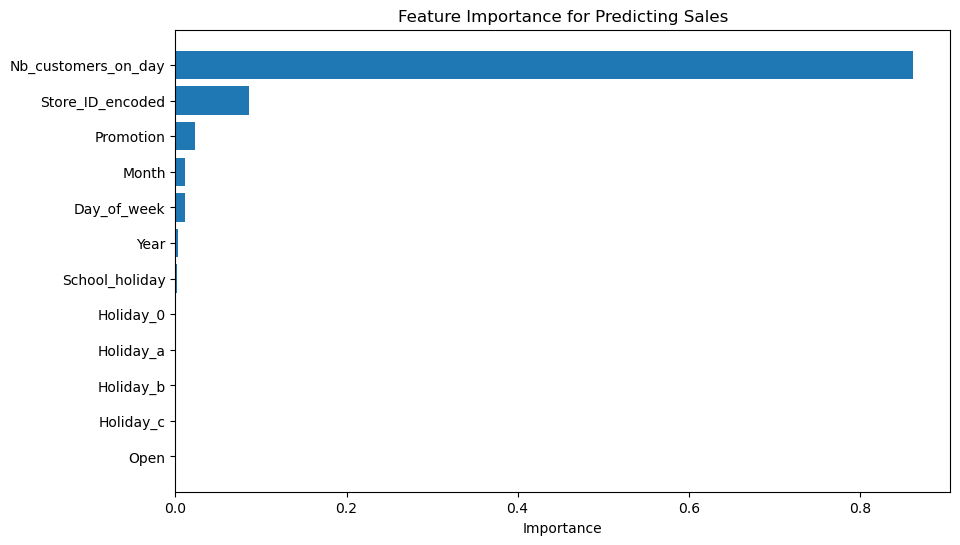

In [36]:
#4. Get and plot feature importances

# Extract feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for easy viewing
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Sales')
plt.gca().invert_yaxis()
plt.show()


In [39]:
#Let's drop columns that are not necessary to save resources and increase the performance prediction.

df.drop(columns=['School_holiday', 'Year', 'Holiday_0','Holiday_a', 'Holiday_b', 'Holiday_c', 'Open'], inplace=True)

In [41]:
df.head()

,Store_ID,Day_of_week,Nb_customers_on_day,Promotion,Sales,Month,Store_ID_encoded
0,625,3,641,1,7293,11,624
1,293,2,877,1,7060,7,292
2,39,4,561,1,4565,1,38
3,676,4,1584,1,6380,9,675
4,709,3,1477,1,11647,1,708


In [43]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest - MSE: 691475.26, R2: 0.95


In [47]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - MSE: {mse_gbr:.2f}, R2: {r2_gbr:.2f}")


Gradient Boosting - MSE: 1673922.32, R2: 0.89


In [49]:
#Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")

Linear Regression - MSE: 2195778.33, R2: 0.85


In [ ]:
#DecisionTree



In [ ]:
#KNeighbors

In [ ]:
#SVR

In [ ]:
#Let’s test XGBoost and LightGBM — both are powerful gradient boosting algorithms and often outperform others in structured/tabular data.
# 1. pip install xgboost lightgbm

In [53]:
# 2. Test XGBoost Regressor

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f}")

XGBoost - MSE: 1023973.23, R2: 0.93


In [55]:
#3. Test LightGBM Regressor

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM - MSE: {mse_lgbm:.2f}, R2: {r2_lgbm:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 512672, number of used features: 12
[LightGBM] [Info] Start training from score 5775.843565
LightGBM - MSE: 1270882.15, R2: 0.92


In [ ]:
Random Forest - MSE: 691475.26, R2: 0.95
Gradient Boosting - MSE: 1673922.32, R2: 0.89
Linear Regression - MSE: 2195778.33, R2: 0.85
XGBoost - MSE: 1023973.23, R2: 0.93
LightGBM - MSE: 1270882.15, R2: 0.92

C:\Users\npdan\AppData\Local\Temp\ipykernel_9420\3418507902.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')


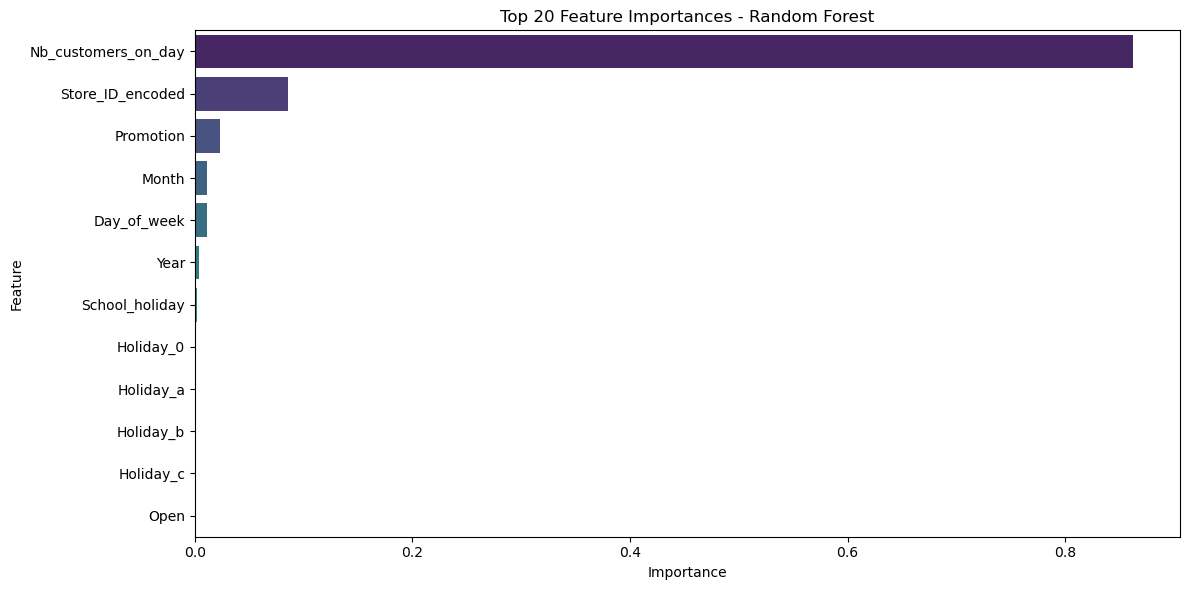

In [57]:
#Visualize Feature Importances from Random Forest

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and match them with feature names
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [61]:
#Let's tune the Random Forest Regressor using RandomizedSearchCV to efficiently search a wide range of hyperparameters.

#Step 1: Define the Hyperparameter Grid

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [63]:
#Step 2: Run RandomizedSearchCV

# Create a new Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring='r2'
)

# Fit the model
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\npdan\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2', verbose=1)

In [65]:
#Step 3: Display Best Parameters and Score

print("Best Parameters:\n", rf_random.best_params_)
print("Best R² Score on Validation Set:", rf_random.best_score_)


Best Parameters:
 {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best R² Score on Validation Set: 0.9059444879902105


In [69]:
# Recreate the best model using known best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
best_rf_model.fit(X_train, y_train)

# Evaluate performance
from sklearn.metrics import r2_score, mean_squared_error

y_pred = best_rf_model.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))

Test R²: 0.9077396963965395
Test MSE: 1388980.343252192


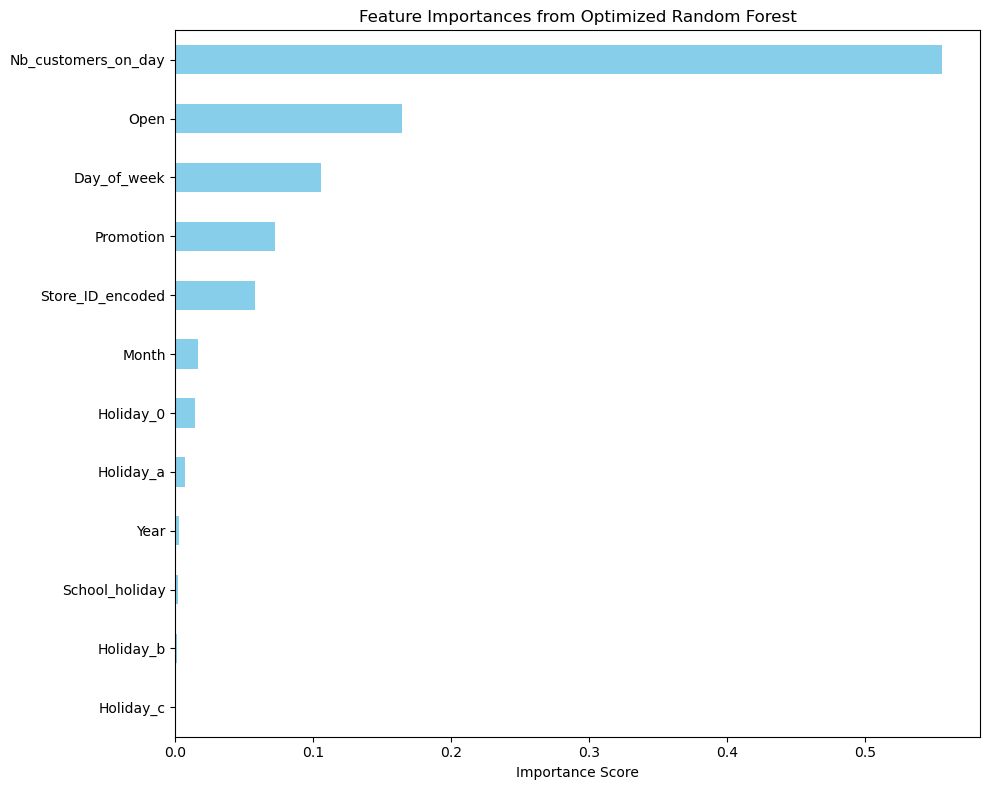

In [71]:
# Now that I’ve fit the optimized RandomForestRegressor, I can plot the feature importances like this:

# Assuming X_train is my input DataFrame
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_importances = pd.Series(importances, index=feature_names)
feat_importances_sorted = feat_importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
feat_importances_sorted.plot(kind='barh', color='skyblue')
plt.title('Feature Importances from Optimized Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [73]:
# Make predictions using the optimized model
y_pred = best_rf_model.predict(X)

# Add predictions as a new column to the original DataFrame
df['Sales_Prediction'] = y_pred

# Display the first few rows to confirm
print(df[['Sales', 'Sales_Prediction']].head())

   Sales  Sales_Prediction
0   7293       7050.609906
1   7060       7658.467049
2   4565       5806.957922
3   6380       8001.093877
4  11647      11511.888786


In [75]:
#Evaluate the prediction accuracy of the model both statistically and visually.

# 1. Statistical Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# True and predicted values
y_true = df['Sales']
y_pred = df['Sales_Prediction']

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 508.60
Root Mean Squared Error (RMSE): 786.56
R² Score: 0.9583


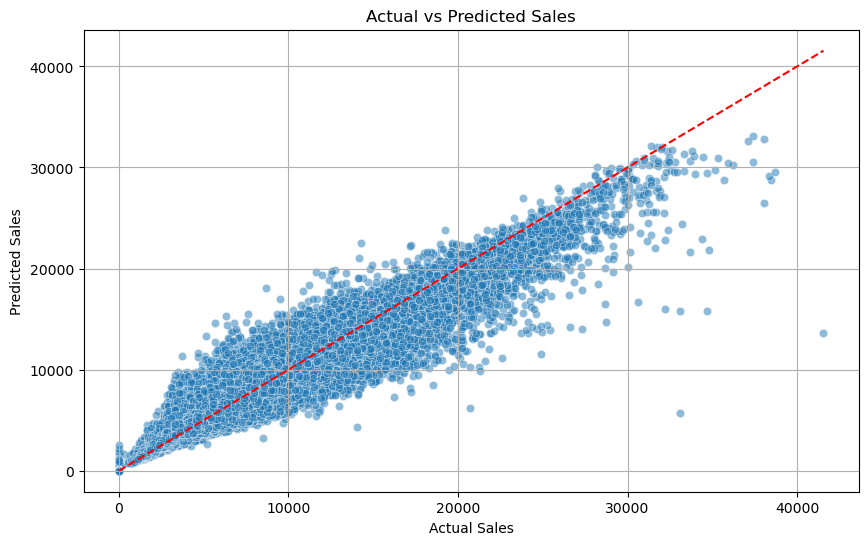

In [77]:
#2. Visual Evaluation

#Plot Actual vs Predicted Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Identity line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()



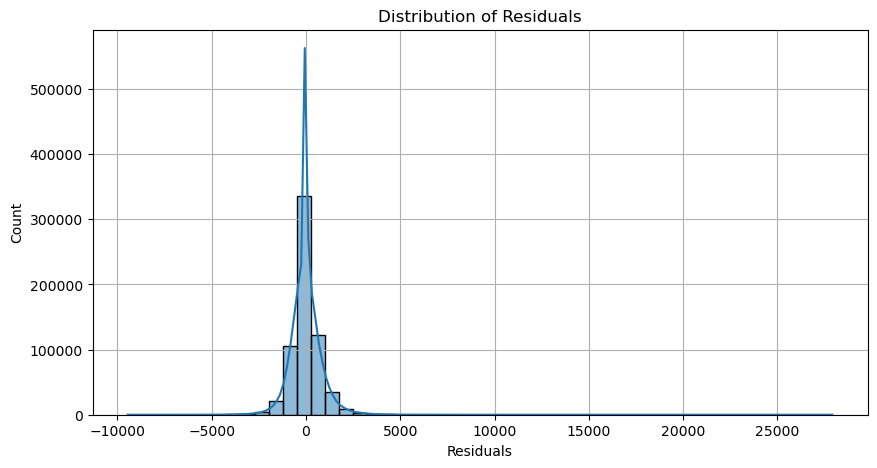

In [79]:
#Plot Residuals

residuals = y_true - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()

In [81]:
df['Residual'] = df['Sales'] - df['Sales_Prediction']
top_outliers = df[np.abs(df['Residual']) > df['Residual'].std() * 3]

In [83]:
# Predict sales
y_pred = model.predict(X)

# Add predictions and residuals to your DataFrame
df['Sales_Prediction'] = y_pred
df['Residual'] = df['Sales'] - df['Sales_Prediction']

# Save the updated DataFrame for further analysis
df.to_csv("sales_predictions_with_residuals.csv", index=False)

In [ ]:
IH_LABS/sales_predictions_with_residuals.csv

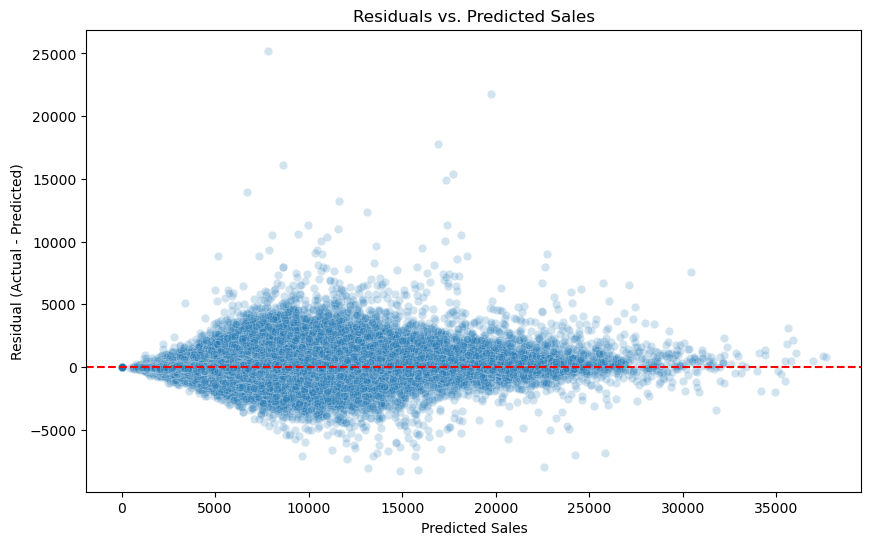

In [85]:
#Residuals vs. Predicted Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Sales_Prediction'], y=df['Residual'], alpha=0.2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs. Predicted Sales")
plt.show()

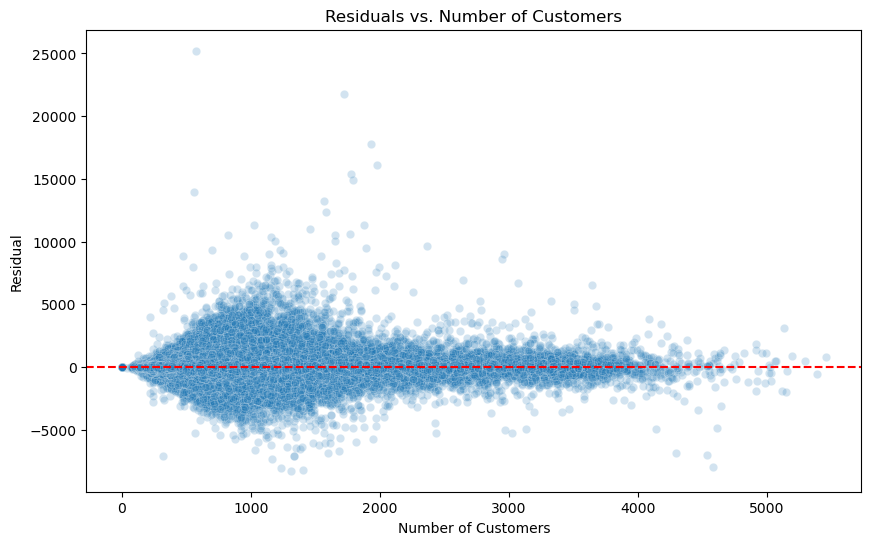

In [87]:
#Residuals vs. Number of Customers
#Test if the model under- or overestimates sales based on customer count.

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Nb_customers_on_day'], y=df['Residual'], alpha=0.2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Number of Customers")
plt.ylabel("Residual")
plt.title("Residuals vs. Number of Customers")
plt.show()


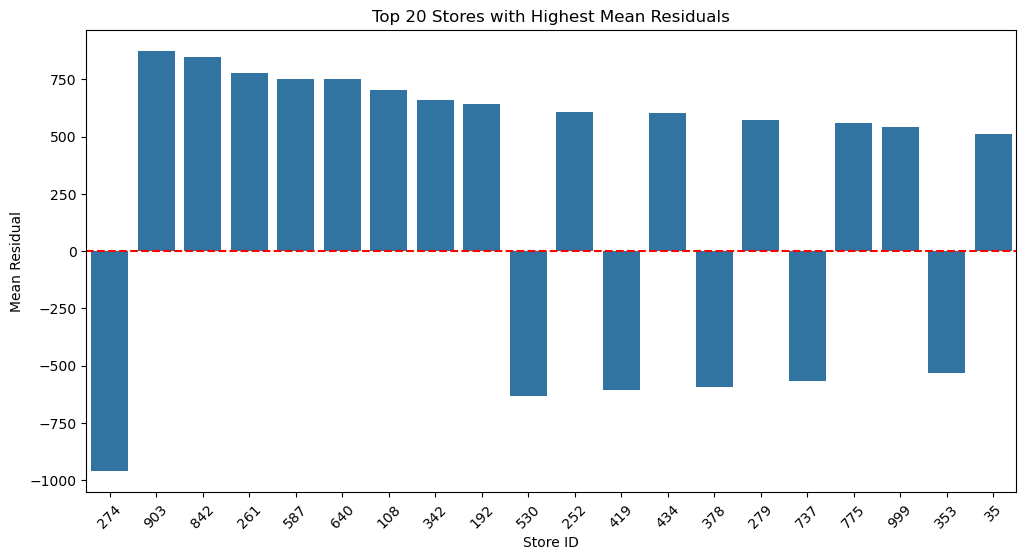

In [89]:
#Mean Residual by Store (Top 20 by error)
#Helps identify which stores have systematic under- or over-predictions.

store_residuals = df.groupby('Store_ID')['Residual'].mean().sort_values(key=abs, ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=store_residuals.index.astype(str), y=store_residuals.values)
plt.axhline(0, color='red', linestyle='--')
plt.title("Top 20 Stores with Highest Mean Residuals")
plt.ylabel("Mean Residual")
plt.xlabel("Store ID")
plt.xticks(rotation=45)
plt.show()
